In [1]:
%matplotlib inline
%run util_draw.py
# #### included in util_draw.py ...
# from matplotlib import rc
# rc('text', usetex=True)
# import matplotlib.pyplot as plt
# from matplotlib.colors import LogNorm
# import matplotlib.gridspec as gridspec
# import rootpy.plotting.root2matplotlib as rplt
# import ROOT as R
# ####

import rootpy as rpy
from rootpy.io import root_open
from rootpy.plotting import Hist, Hist2D, HistStack

In [2]:
dir_data = '/home/ephelps/projects/phys-ana-omega/e1f6/test'
fn_data = 'e1f_sample60_eskim_hists_only.root'
fn_out = 'e1f_sample60_eskim_fid.root'

# SC, flange

In [3]:
h2s_sc = None
with root_open('%s/%s'%(dir_data, fn_data)) as fin:
    h2s_sc = [fin.efid_hists_eid['hsc_x_V_y_%d'%sect] for sect in range(1,7)]
    for h2_sc in h2s_sc:
        h2_sc.SetDirectory(0)

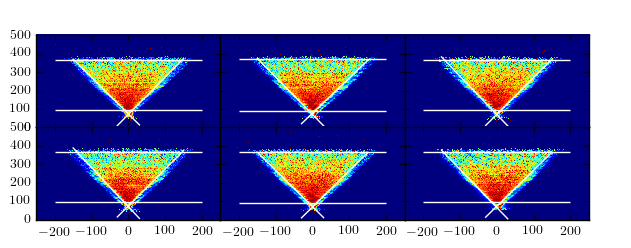

efid_sc_x_of_y	1,92,366,-1.978,73,2.020,71
efid_sc_x_of_y	2,91,369,-2.028,70,1.906,78
efid_sc_x_of_y	3,92,364,-2.080,70,1.998,70
efid_sc_x_of_y	4,94,368,-2.123,70,2.001,75
efid_sc_x_of_y	5,92,365,-1.968,70,1.968,69
efid_sc_x_of_y	6,97,369,-2.070,66,1.953,72


In [6]:
parmsets = []
fig_sc = sdraw([norm_y_slices(h2_sc) for h2_sc in h2s_sc])

for (sect, h2_sc) in enumerate(h2s_sc, 1):
    # h2_sc = h2s_sc[0]
    h2 = h2_sc.clone().rebin2_d(2, 8)
    window = 1
    looseness = 0.35
    (ylo, yhi) = get_ylims_of_xmid(h2_sc)
    edge_loX, edge_hiX = get_plateau_edges_2d(h2, looseness, window, ylo, yhi)

    ax = fig_sc.get_axes()[sect-1]
    
#     ax.plot(*zip(*edge_loX), color='k', marker='*', linestyle='none')
#     ax.plot(*zip(*edge_hiX), color='k', marker='*', linestyle='none')
    zL = np.polyfit(*zip(*edge_loX), deg=1)
    f = np.poly1d(zL)
    X = np.linspace(-150, 30, 180)
    Y = f(X)
    ax.plot(X,Y,'w', linewidth=1)
    zH = np.polyfit(*zip(*edge_hiX), deg=1)
    f = np.poly1d(zH)
    X = np.linspace(-30, 150, 180)
    Y = f(X)
    ax.plot(X,Y,'w', linewidth=1)
    ax.hlines([ylo, yhi], -200, 200, 'w')
    parmsets.append((sect, ylo, yhi, zL[0], zL[1], zH[0], zH[1]))

plt.show()

for parms in parmsets:
    print('efid_sc_x_of_y\t%d,%.0f,%.0f,%.3f,%.0f,%.3f,%.0f'%parms)

# EC, uvw

In [ ]:
draw(norm_x_slices(h2_u1), figsize=goldenaspect(6))
plt.vlines(20, 0, 0.5, 'w')
plt.vlines(400, 0, 0.5, 'w')
draw(norm_x_slices(h2_v1), figsize=goldenaspect(6))
plt.vlines(375, 0, 0.5, 'w')
draw(norm_x_slices(h2_w1), figsize=goldenaspect(6))
plt.vlines(410, 0, 0.5, 'w')
print(h2_u1.name, h2_v1.name, h2_w1.name)

# electron, p-theta-phi

In [1]:
def get_p_from_hn(hn):
    (p0, p1) = [float(pstr) for pstr in hn.split('_')[1:3]]
    return (p0+p1)/2

with root_open('%s/%s'%(dir_data, fn_data)) as fin:
    pass

NameError: name 'root_open' is not defined